In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
# loading the csv data to a Pandas DataFrame
silver_data = pd.read_csv('new_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'new_data.csv'

In [ ]:
# print first 5 rows in the dataframe
silver_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
silver_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
4225,25-09-2023,1841.285580,129.706183,71.249520,13.198525,1.233159
4226,26-09-2023,2797.329168,126.729140,46.448135,24.758896,1.075114
4227,27-09-2023,1691.418297,83.450957,53.909334,44.625172,1.483336
4228,28-09-2023,2327.914202,126.688778,30.521861,21.799082,1.311898
4229,29-09-2023,1468.219123,81.586744,77.870222,16.725314,1.332160


In [ ]:
# number of rows and columns
silver_data.shape

(4230, 6)

In [ ]:
# getting some basic informations about the data
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4230 non-null   object 
 1   SPX      4230 non-null   float64
 2   GLD      4230 non-null   float64
 3   USO      4230 non-null   float64
 4   SLV      4230 non-null   float64
 5   EUR/USD  4230 non-null   float64
dtypes: float64(5), object(1)
memory usage: 198.4+ KB


In [ ]:
# checking the number of missing values
silver_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
silver_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000
mean,1700.837508,114.738583,37.725698,23.408102,1.269414
std,563.266296,21.506670,20.714108,9.324848,0.139102
min,676.530029,70.000000,7.960000,8.850000,1.000043
25%,1238.170437,98.322317,20.782631,15.910000,1.138823
50%,1669.848745,114.870436,35.590680,19.930009,1.288874
75%,2121.804447,124.967500,47.840329,30.776877,1.372360
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = silver_data.corr()

C:\Users\91892\AppData\Local\Temp\ipykernel_12784\660943657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = silver_data.corr()


<AxesSubplot:>

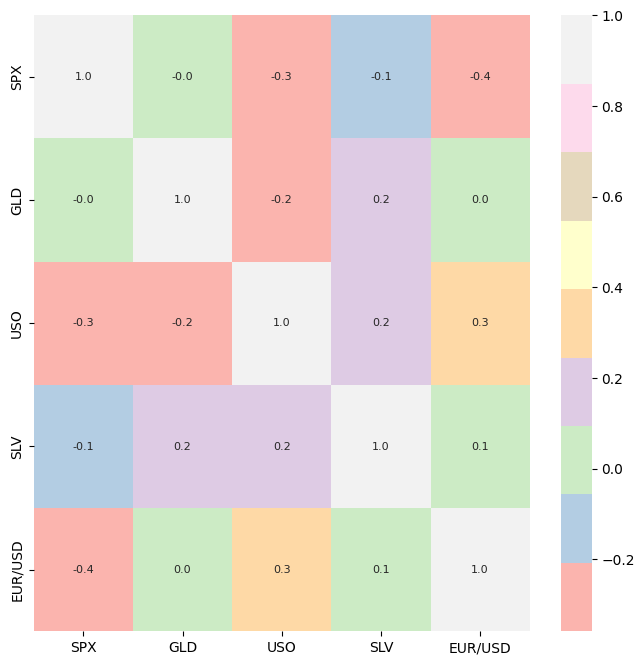

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=False, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Pastel1')

In [ ]:
# correlation values of SLV
print(correlation['SLV'])

SPX       -0.089362
GLD        0.230473
USO        0.189571
SLV        1.000000
EUR/USD    0.089860
Name: SLV, dtype: float64


C:\Users\91892\AppData\Local\Temp\ipykernel_12784\4177042700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silver_data['SLV'],color='blue')


<AxesSubplot:xlabel='SLV', ylabel='Density'>

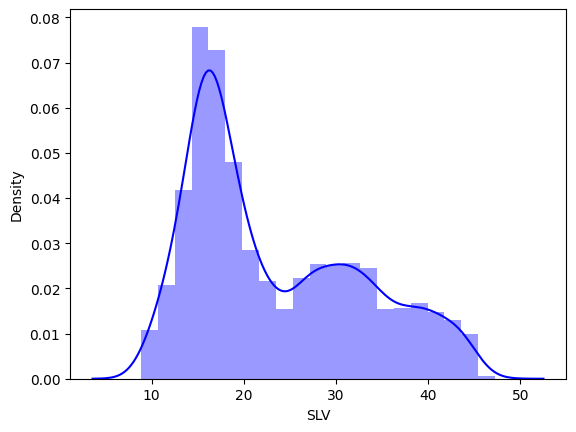

In [ ]:
# checking the distribution of the SLV Price
sns.distplot(silver_data['SLV'],color='blue')

Splitting the Features and Target

In [ ]:
X = silver_data.drop(['Date','SLV'],axis=1)
Y = silver_data['SLV']

In [ ]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
4225  1841.285580  129.706183  71.249520  1.233159
4226  2797.329168  126.729140  46.448135  1.075114
4227  1691.418297   83.450957  53.909334  1.483336
4228  2327.914202  126.688778  30.521861  1.311898
4229  1468.219123   81.586744  77.870222  1.332160

[4230 rows x 4 columns]


In [ ]:
print(Y)

0       15.180000
1       15.285000
2       15.167000
3       15.053000
4       15.590000
          ...    
4225    13.198525
4226    24.758896
4227    44.625172
4228    21.799082
4229    16.725314
Name: SLV, Length: 4230, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Checking Accuracy
regressor.score(X_train,Y_train)

0.9159577428352238

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[33.57399959 31.15420015 36.83729964 24.35736309 13.73304475 14.65350713
 20.53509287 31.51490049 21.07547836 16.07638186 28.22834959 15.30317757
 26.33038487 22.16800004 19.66508027 23.10286059 11.71783212 33.63930071
 24.6180502  15.98764062 24.64898372 28.39607491 30.96523347 21.09095881
 17.90530081 18.94599996 31.72869952 15.5579     28.77857378 21.64398902
 18.92419994 31.40340025 31.84499989 30.26540036 19.0888534  24.83234957
 27.39626285 26.65339728 22.09749834 17.00869994 16.63379957 13.29893301
 25.37750744 21.27630587 30.38818364 15.67129031 28.64124754 17.24259997
 28.99291833 29.70040002 15.2873452  17.53006928 16.33257486 15.9245
 16.88805599 27.28250018 24.25038833 16.99049983 25.40143299 32.11027908
 17.19340004 30.22050575 32.51596296 14.55566759 27.43141527 16.06930001
 18.16306725 16.1594287  25.42116541 13.92209834 32.62450133 27.92339027
 17.58620885 16.58160007 27.3999488  22.88578841 27.65006968 17.99970968
 23.95597225 38.07070015 19.0348227  20.02729989 25.447

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3999014490204784


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

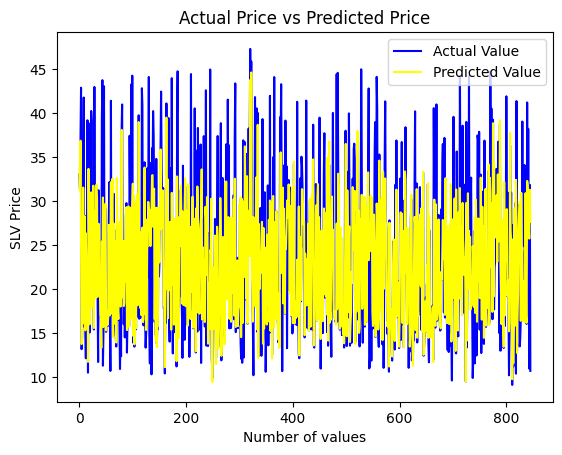

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SLV Price')
plt.legend()
plt.show()

building a predictive system

In [ ]:
input_data = (1416.25,89.54, 74.25, 1.4869)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[18.1276677]
The insurance cost is USD  18.127667695800014


c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
pickle.dump(regressor,open("silver_predictor.pkl","wb"))

In [ ]:
regressor = pickle.load(open('silver_predictor.pkl',"rb"))

In [ ]:
predict = regressor.predict(input_data_reshaped)[0]

NameError: name 'regressor' is not defined

In [ ]:
predict

NameError: name 'predict' is not defined